In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('delivery_time.csv')

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


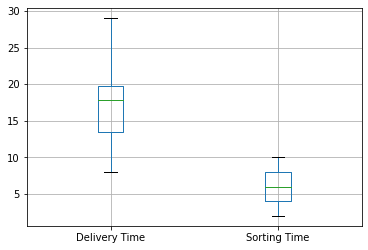

In [9]:
data.boxplot();

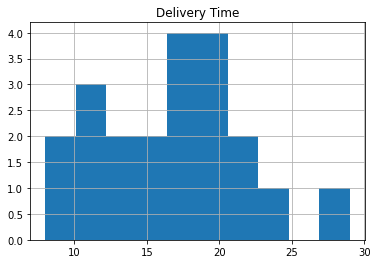

In [10]:
data.hist(['Delivery Time']);

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


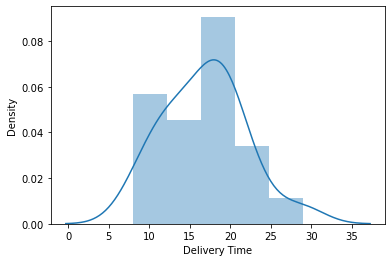

In [11]:
sns.distplot(data['Delivery Time']);

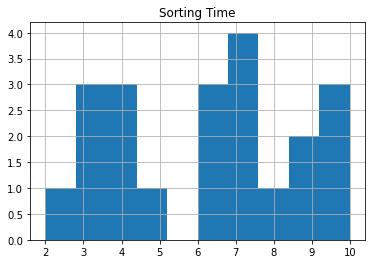

In [12]:
data.hist(['Sorting Time']);

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


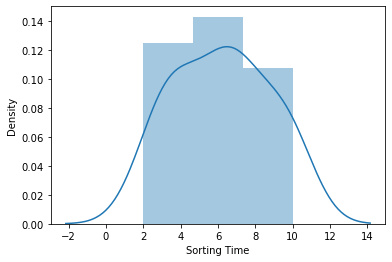

In [13]:
sns.distplot(data['Sorting Time']);

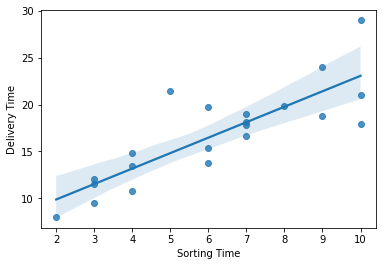

In [14]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time']);

In [15]:
data=data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)

In [16]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [29]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# DATA TRANSFORMATION

In [31]:
data_log = np.log(data)

In [32]:
data_log

,Delivery_Time,Sorting_Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [33]:
data_sqrt = np.sqrt(data)

In [34]:
data_sqrt

,Delivery_Time,Sorting_Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


In [36]:
data_cbrt = np.cbrt(data)

In [37]:
data_cbrt

,Delivery_Time,Sorting_Time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435
5,2.485246,1.817121
6,2.668402,1.912931
7,2.117912,1.442250
8,2.615879,2.154435
9,2.656646,2.080084


PREDICTIONS

In [21]:
model=smf.ols("Sorting_Time~Delivery_Time",data=data).fit()

In [22]:
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [23]:
model.pvalues

Intercept        0.512611
Delivery_Time    0.000004
dtype: float64

In [30]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
Delivery_Time = (6.582734) + (1.649020)*(5)

In [25]:
new_data=pd.Series([5,8])

In [41]:
data_preds=pd.DataFrame(new_data,columns=['Sorting_Time'])

In [42]:
data_preds

,Sorting_Time
0,5
1,8
